# Eure erste Netzwerkanalyse

Wir importieren die Libraries, die wir für die Netzwerkanalyse benötigen. <br>
<i>Zur Erinnerung: Mit der Nutzung von Libraries sparen wir uns Programmieraufwand, weil wir bereits fertige Komponenten nutzen können.</i>

In [1]:
import pandas as pd # eine Library, die uns dabei hilft Daten vorzubereiten
import networkx as nx # eine Library, die auf Netzwerkanalyse spezialisiert ist
import openpyxl # eine Library, die mit Excel-Dateien umgehen kann
import matplotlib # eine Library, die auf Visualisierungen spezialisiert ist


Wir beginnen außerhalb vom Jupyter Notebook. Bitte bereitet Eure Kantenliste in Excel vor. <br> <br>
Im nächsten Schritt importieren wir Euren Excelfile 

In [10]:
df = pd.read_excel('Daten für Netzwerkanalyse.xlsx', sheet_name='Tabelle1')

Jetzt schauen wir uns die ersten 5 Zeilen der importierten Daten an:

In [11]:
df.head()

,Knoten 1,Knoten 2
0,A,B
1,A,F
2,A,C
3,B,C
4,C,F


Jetzt erzeugen wir mithilfe unserer Kantenliste einen Graph namens "G". Ein Graph ist noch nicht die Visualisierung selbst, beinhaltet bereits aber diverse Informationen, die für die Visualisierung notwendig sind.

In [12]:
G = nx.from_pandas_edgelist(df, source='Knoten 1', target='Knoten 2')

Jetzt wählen wir ein Layout, das für die Visualisierung noch einen notwendigen Parameter darstellt. Das Spring-Layout ist ein guter Start.<br><br>
Wer später nochmal mit anderen Layouts experimentieren möchte, hier ein Link zur Doku: <br>
https://networkx.org/documentation/stable/reference/drawing.html

In [13]:
pos = nx.spring_layout(G)

Im nächsten Schritt erstellen wir die Visualisierung. Die erste Zeile erzeugt die Knoten und die zweite Zeile die Kanten.

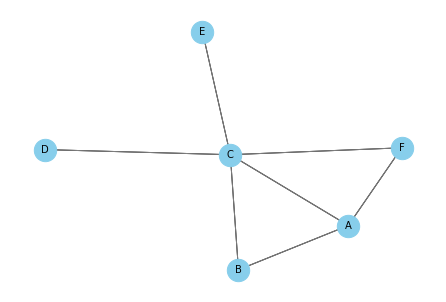

In [14]:
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1, edge_color='gray')

Hier findet ihr die Dokumentation von networkx, wie ihr die Visualisierung anpassen könnt:<br>
https://networkx.org/documentation/stable/reference/drawing.html

Wir errechnen die Zentralitätsmaße des Netzwerks. Zunächst für die Knoten.

In [8]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

Wir speichern die Ergebnisse in einem Pandas Dataframe.

In [15]:
data = {
    'Node': list(G.nodes()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values())
}

df_kpis = pd.DataFrame(data)

Wir schauen uns die Ergebnisse an.

In [18]:
df_kpis.head(10)

,Node,Degree Centrality,Closeness Centrality,Betweenness Centrality
0,A,0.6,0.714286,0.05
1,B,0.4,0.625000,0.00
2,F,0.4,0.625000,0.00
3,C,1.0,1.000000,0.75
4,D,0.2,0.555556,0.00
5,E,0.2,0.555556,0.00


Wir berechnen die Dichte des Netzwerks und lassen uns diese auch direkt ausgeben.

In [19]:
graph_density = nx.density(G)

print(f"Graph Density: {graph_density}")

Graph Density: 0.4666666666666667


## Glückwunsch. Fertig ist deine erste Netzwerkanalyse!